# Lab 2

#### Joseph Livesey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

Let the average cosmic-ray background in 1 day be $X = 7.5$ and the average number of gamma rays emitted by the source in question is $Y = 50$. We can see how this background changes when we sum over multiple days and average the resulting distributions.

In [2]:
background_1 = [stats.poisson(7.5).pmf(k) for k in np.arange(0, 100)]
background_2 = signal.convolve(background_1, background_1)
background_3 = signal.convolve(background_2, background_1)
background_4 = signal.convolve(background_3, background_1)
background_5 = signal.convolve(background_4, background_1)
background_6 = signal.convolve(background_5, background_1)
background_7 = signal.convolve(background_6, background_1)
background_8 = signal.convolve(background_7, background_1)
background_9 = signal.convolve(background_8, background_1)
background_10 = signal.convolve(background_9, background_1)

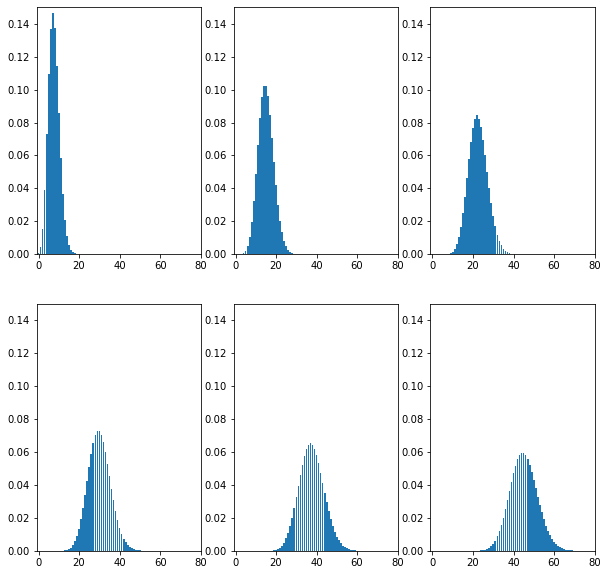

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax[0, 0].bar(range(len(background_1)), background_1)
ax[0, 1].bar(range(len(background_2)), background_2)
ax[0, 2].bar(range(len(background_3)), background_3)
ax[1, 0].bar(range(len(background_4)), background_4)
ax[1, 1].bar(range(len(background_5)), background_5)
ax[1, 2].bar(range(len(background_6)), background_6)
for i in range(2):
    for j in range(3):
        ax[i, j].set_xlim(-1, 80)
        ax[i, j].set_ylim(0, 0.15);

Mathematically, it makes sense that when averaged over several days the background is still a Poisson distribution, because .... Conceptually, the Poisson distribution counts the number of independent events (like cosmic ray counts) over a certain interval of time or space. So, it makes sense that the background is always Poissonian.

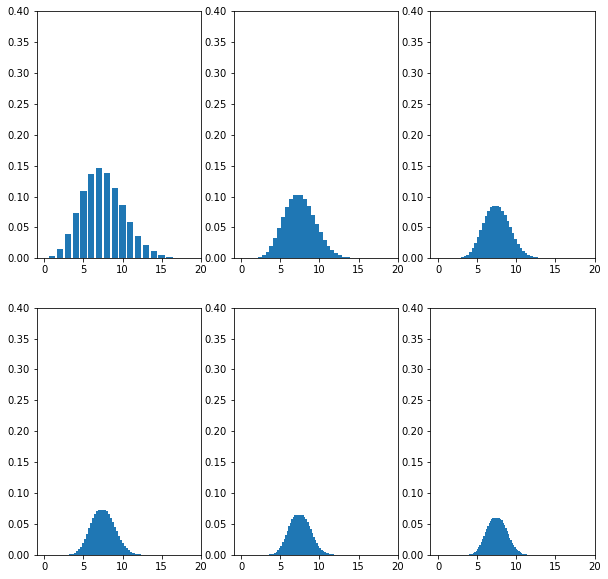

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax[0, 0].bar(range(len(background_1)), background_1)
ax[0, 1].bar([k/2 for k in range(len(background_2))], background_2)
ax[0, 2].bar([k/3 for k in range(len(background_3))], background_3)
ax[1, 0].bar([k/4 for k in range(len(background_4))], background_4)
ax[1, 1].bar([k/5 for k in range(len(background_5))], background_5)
ax[1, 2].bar([k/6 for k in range(len(background_6))], background_6)
for i in range(2):
    for j in range(3):
        ax[i, j].set_xlim(-1, 20)
        ax[i, j].set_ylim(0, 0.4);

Clearly, it is advantageous to average over multiple days, as this reduces the probability of a false measurement close to the mean of the distribution.

Let's assume that we took measurements over $N=10$ days. We then expect that we have observed $YN = 500$ gamma rays in this time. We want to determine the significance of this measurement against the background.

Concisely stated: What is the probability that the background created a signal of this strength (or greater)?

In math: What is the probability $p(YN)$?

$$ p(YN) = \sum_{k=YN}^\infty \text{pdf}(k) $$

We can use our already-calculated Poisson distribution convolved 10 times.

In [5]:
total = sum(background_10)
tail = sum(background_10[499:])

probability = tail/total
probability

5.842515586585047e-229

We can now use `scipy` to convert this to a sigma value.

In [6]:
sigma = stats.norm.ppf(probability)
sigma

-32.28412469108659

This situation I made up would be incredible in real life, because it corresponds to a $32\sigma$ measurement.